# Linear Spectral Unmixing with Least Squares

### Problem Statement

In the case of spectral data, for a given pixel we suppose to have a set of intensity measurements at different wavelengths, e.g., $I = [I(\lambda_1),I(\lambda_2),\dots,I(\lambda_n)]$, with $n=32$ for instance. For each one of these spectral bands $\lambda_i$, with $i=1,\dots,n$, and for each fluorophore $f$, with $f=1,\dots,m$, we assume to know the reference spectra $R_f=[R_f(\lambda_1), R_f(\lambda_2), \dots, R_f(\lambda_n)]$. Therefore, $I $ is a column vector of size $n$ and $R_f$ are columns of a matrix $\mathbf{R}$ of size $m\times n$. In this context, we define the concentration of the different fluorophores in the sample as a row vector $C = [C_1, C_2, \dots, C_m]$ of size $m$. Therefore, the problem of linear unmixing reads as follows: <br><br>

\begin{equation}
I = C\mathbf{R}
\end{equation}

or, by specifying the vectors and matrix:

\begin{align}
    \begin{bmatrix}
        I(\lambda_1) \\
        I(\lambda_2) \\
        \vdots \\
        I(\lambda_n)
    \end{bmatrix}
        = 
    \begin{bmatrix}
        C_{1} & C_{2} & \dots & C_{m}
    \end{bmatrix}
    \begin{bmatrix}
        R_{1}(\lambda_1) & R_{1}(\lambda_2) & \dots & R_{1}(\lambda_n) \\
        R_{2}(\lambda_1) & R_{2}(\lambda_2) & \dots & R_{2}(\lambda_n) \\
        \vdots & \vdots & \ddots & \vdots \\
        R_{m}(\lambda_1) & R_{m}(\lambda_2) & \dots & R_{m}(\lambda_n) \\
    \end{bmatrix}
\end{align}

### Least Square Estimation

Least Squares is a method that allows to solve the system. It works as follows:

**Goal:** to compute $C$ such that it minimizes the objective $J(C)=||I - C\mathbf{R}||^2$.

**How:** by setting the derivative of $J(C)$ w.r.t. $C$ to $0$. Namely:
\begin{align}
\frac{\partial{J(C)}}{\partial{C}}=-2(I-C\mathbf{R})\mathbf{R}^T=0 \Longrightarrow C\mathbf{R}\mathbf{R}^T=I\mathbf{R}^T \Longrightarrow C=I\mathbf{R}^T(\mathbf{R}\mathbf{R}^T)^{-1} 
\end{align}

**NOTES**

- Notice that in the context of a spectral image we need to repeat this procedure for every pixel.
- $I(\lambda_i)$'s are the intensity values for a given pixel in the mixed image at wavelength $\lambda_i$.
- $R_f(\lambda_i)$'s are the intensity values in the reference spectrum of fluorophore $f$ at wavelength $\lambda_i$.
- For the moment we work with MIP and not with the whole 3D volumes. 

#### 1. Data Preparation

Load mixed image & metadata:

In [3]:
import os
import json
import tifffile as tiff

DATA_DIR = '/Volumes/jug/federico/microsim/sim_spectral_data/240703'

mixed_opt_img = tiff.imread(os.path.join(DATA_DIR, "mips/optical_mixed_mip.tif"))
with open(os.path.join(DATA_DIR, "sim_coords.json"), "r") as f:
    coords_metadata = json.load(f)

Get reference spectra from `FPBase` using `microsim` API:

In [1]:
from microsim.schema.sample import Fluorophore

fp1 = Fluorophore.from_fpbase(name="mTurquoise")
fp2 = Fluorophore.from_fpbase(name="EYFP")
fp3 = Fluorophore.from_fpbase(name="mScarlet")

In [2]:
fp1_em_spec = fp1.emission_spectrum
fp2_em_spec = fp2.emission_spectrum
fp3_em_spec = fp3.emission_spectrum

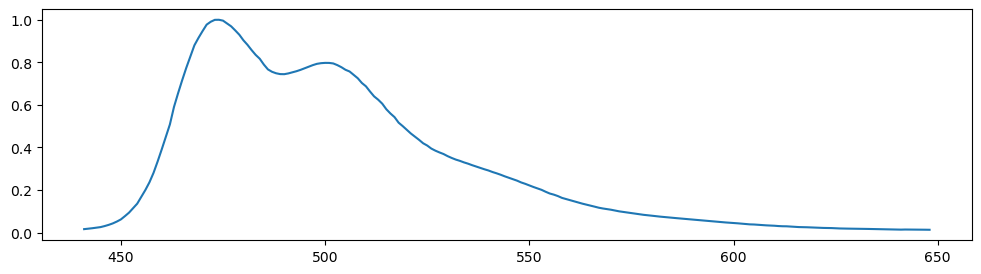

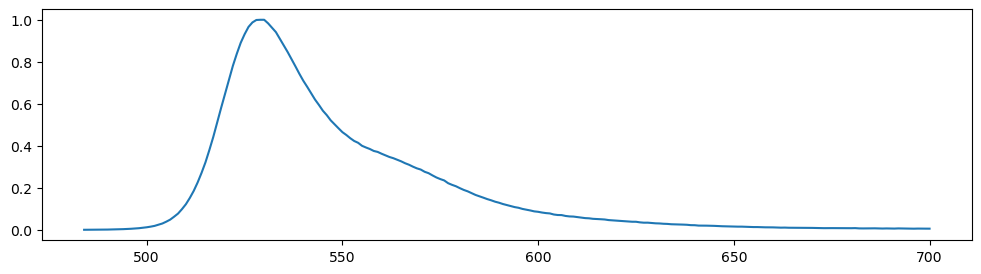

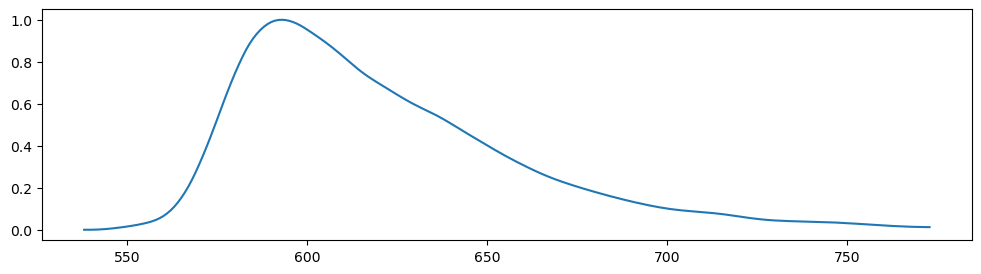

In [3]:
fp1_em_spec.plot()
fp2_em_spec.plot()
fp3_em_spec.plot()

In [4]:
fp1_em_spec.intensity.shape, fp1_em_spec.wavelength.shape

((208,), (208,))

In [ ]:


# Bin the intensities similarly to the data
